In [1]:
%load_ext autoreload
%autoreload 2

### **Important:**  
As in the last notebook, in the next cell you need to update the `your_username` variable with **Your Username** (between the single quotes).  After you have done that, in principle, you should be able to run the notebook all at once instead of cell by cell. 

In [2]:
#Please enter your SciServer username between the single quotes below!
your_username = ''

In [3]:
# import matplotlib to show plots inline.
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os

Import the sims_maf modules needed.

In [4]:
# import maf python modules
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as metricBundles

In [5]:
# add opsimUtils module path to search
import sys
sys.path.insert(0, '../Scripts_NBs/')

In [6]:
# import convenience functions
from opsimUtils import *

In [7]:
if your_username == '': # do NOT put your username here
    raise Exception('Please provide your username! See the top of the notebook.')

# user provided paths
resultDbPath = '/home/idies/workspace/Storage/{}/persistent/MAFOutput/DDF/'.format(your_username)
metricDataPath = '/home/idies/workspace/Storage/{}/persistent/MAFOutput/DDF/MetricData/'.format(your_username)

In [8]:
# get a dictionary of resultDb from given directory
resultDbs = getResultsDbs(resultDbPath)

# the following line will be useful if you did not run MAF on all 75 opsims
runNames = list(resultDbs.keys())

In [9]:
# retrieve metricBundles for each opsim run and store them in a dictionary
bundleDicts = {}

for runName in resultDbs:
    bundleDicts[runName] = bundleDictFromDisk(resultDbs[runName], runName, metricDataPath)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using

#### **Note:** 
The `metricId` for each metric could vary from opsim to opsim (due to the inconsistency of the proposalId assginment across opsims).

In [10]:
# we see the available metric keys
list(bundleDicts[runNames[0]].keys())

[(1, 'coadd_XMM-LSS_u'),
 (2, 'coadd_COSMOS_u'),
 (3, 'coadd_COSMOS_g'),
 (4, 'coadd_XMM-LSS_g'),
 (5, 'nvisit_XMM-LSS_u'),
 (6, 'nvisit_COSMOS_u'),
 (7, 'nvisit_COSMOS_g'),
 (8, 'nvisit_XMM-LSS_g')]

In [11]:
help(getSummary)

Help on function getSummary in module opsimUtils:

getSummary(resultDbs, metricName, summaryStatName, runNames=None, pandas=False, **kwargs)
    Return one summary statstic for opsims (included in the resultDbs) on a
    particualr metric given some constraints.
    
    Args:
        resultDbs(dict): A dictionary of resultDbs, keys are run names.
        metricName(str): The name of the metric to get summary statistic for.
        summaryStatName(str): The name of the summary statistic get (e.g., Median)
        runNames(list): A list of runNames to retrieve summary stats, if not
            all in resultDbs.
        pandas (bool): Whether to return result in pandas dataframe, otherwise a dictionary
            of numpy record arrays.
    
    Returns:
        stats(dict): Each element is a list of summary stats for the corresponding
            opSim run indicated by the key. This list could has a size > 1, given
            that we can run one metric with different sql constraints.


In [12]:
getSummary(resultDbs, 'coadd_COSMOS_g', 'Median', pandas=True)

,metricId,metricName,slicerName,metricMetadata,summaryName,summaryValue,runName
0,3,coadd_COSMOS_g,HealpixSlicer,g and proposalId 3,Median,28.236082,rolling_mod6_sdf_0.20_v1.5_10yrs
1,1,coadd_COSMOS_g,HealpixSlicer,g and proposalId 6,Median,28.163071,u60_v1.5_10yrs
2,1,coadd_COSMOS_g,HealpixSlicer,g and proposalId 6,Median,28.228790,footprint_stuck_rollingv1.5_10yrs


### 2. Visualize Coadd Metric

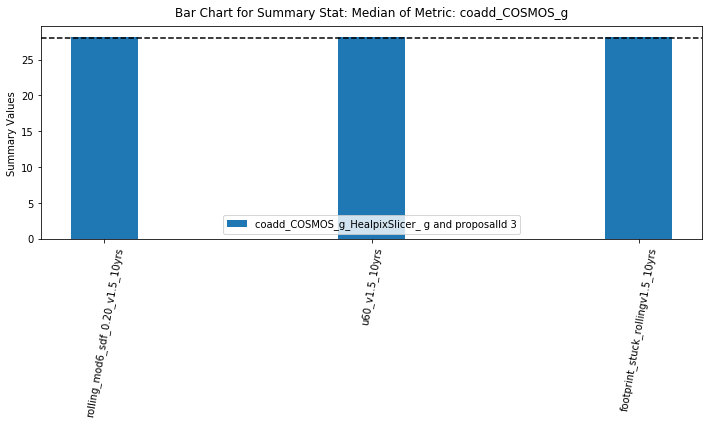

In [13]:
plotSummaryBar(resultDbs, 'coadd_COSMOS_g', 'Median', slicerName = 'HealpixSlicer', axhline=28.7)

/home/idies/lsst/python/miniconda3-4.7.10/envs/lsst-scipipe-4d7b902/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


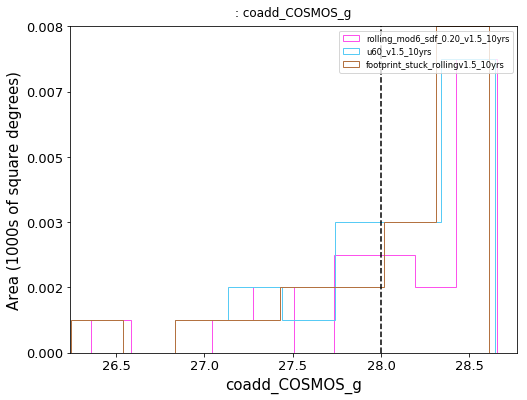

In [14]:
plotHist(bundleDicts, (1, 'coadd_COSMOS_g'), axvline=28.7)

85.60688952343737 94.39311047656263 -4.393110476562625 4.393110476562625
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.
85.60688952343737 94.39311047656263 -4.393110476562625 4.393110476562625
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.
85.60688952343737 94.39311047656263 -4.393110476562625 4.393110476562625
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.


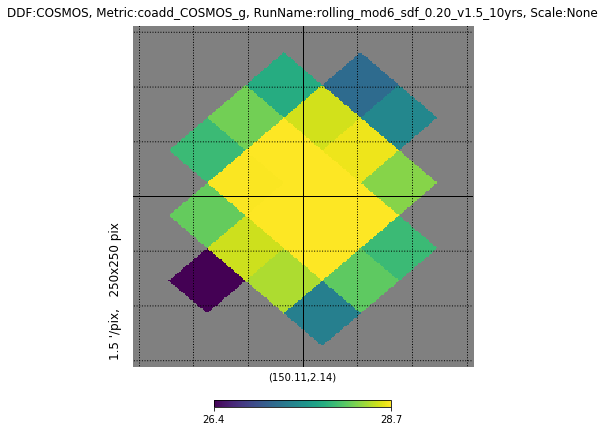

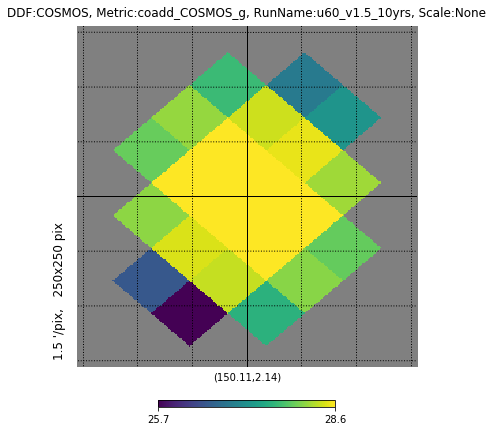

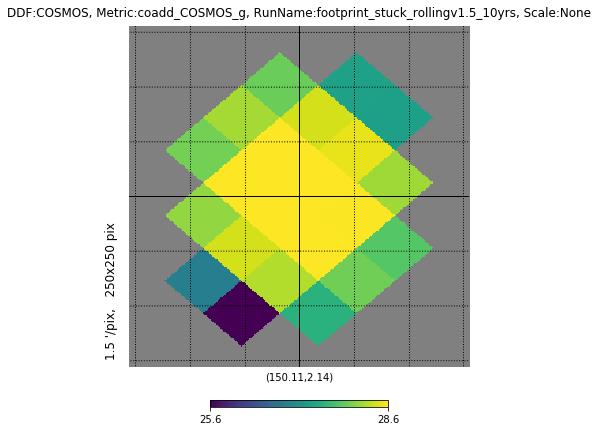

In [15]:
# to get exact metricKey for each metric across different opsims
metricName = 'coadd_COSMOS_g'
summary = getSummary(resultDbs, metricName, 'Median', pandas=True)

# loop over all opsims and make plots
for run in runNames:
    row = summary[summary.runName == run]
    metricKey = (int(row.metricId), metricName)
    plotSky_DDF(bundleDicts[run][metricKey], 'COSMOS')

### 3. Visualize Nvisit Metric
The following basically repeats what were done for the coadd metric.

In [16]:
getSummary(resultDbs, 'nvisit_COSMOS_g', 'Median', pandas=True)

,metricId,metricName,slicerName,metricMetadata,summaryName,summaryValue,runName
0,7,nvisit_COSMOS_g,HealpixSlicer,g and proposalId 3,Median,1210.0,rolling_mod6_sdf_0.20_v1.5_10yrs
1,5,nvisit_COSMOS_g,HealpixSlicer,g and proposalId 6,Median,1195.0,u60_v1.5_10yrs
2,5,nvisit_COSMOS_g,HealpixSlicer,g and proposalId 6,Median,1151.0,footprint_stuck_rollingv1.5_10yrs


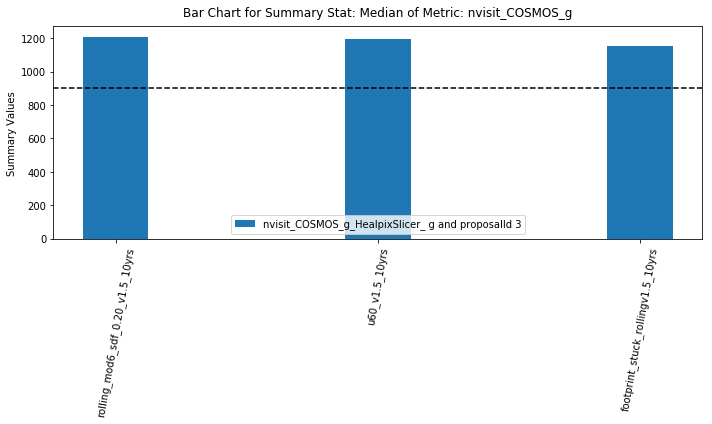

In [17]:
plotSummaryBar(resultDbs, 'nvisit_COSMOS_g', 'Median', \
               slicerName = 'HealpixSlicer', axhline=900)

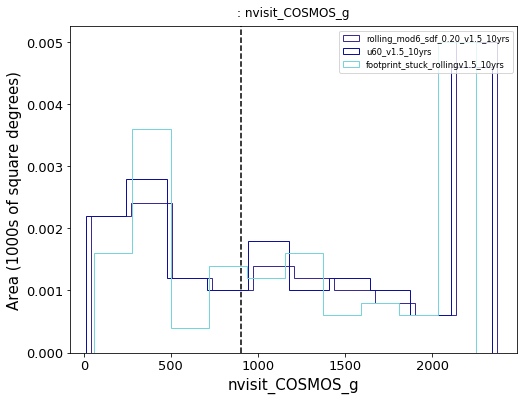

In [18]:
plotHist(bundleDicts, (5, 'nvisit_COSMOS_g'), axvline=900)

85.60688952343737 94.39311047656263 -4.393110476562625 4.393110476562625
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.
85.60688952343737 94.39311047656263 -4.393110476562625 4.393110476562625
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.
85.60688952343737 94.39311047656263 -4.393110476562625 4.393110476562625
The interval between parallels is 1 deg 0.00'.
The interval between meridians is 1 deg 0.00'.


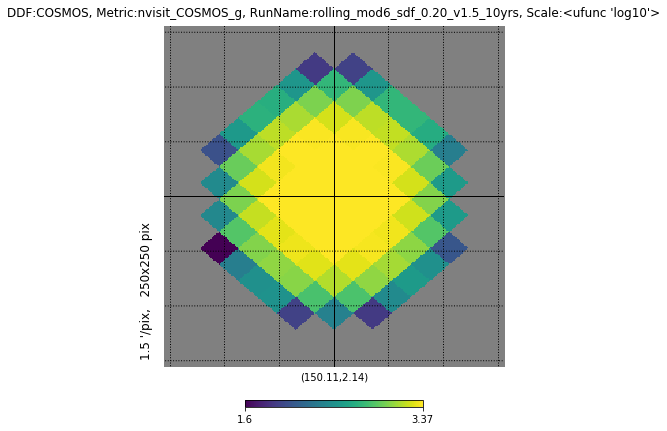

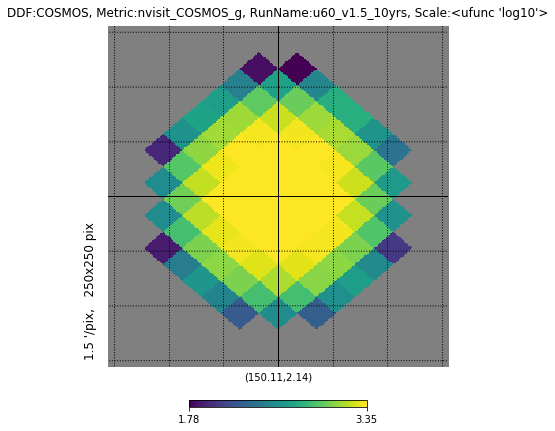

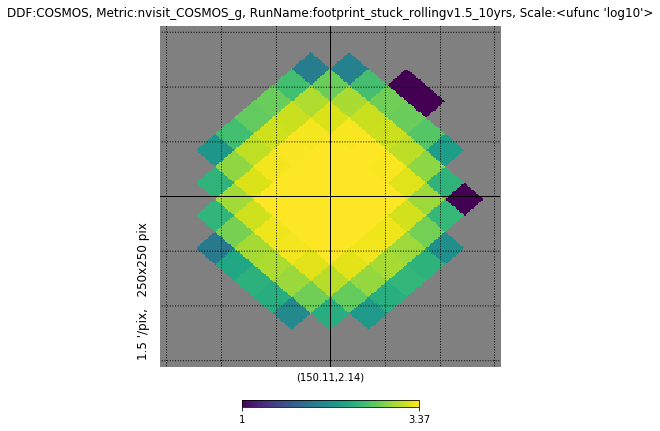

In [19]:
# to get exact metricKey for each metric across different opsims
metricName = 'nvisit_COSMOS_g'
summary = getSummary(resultDbs, metricName, 'Median', pandas=True)

# loop over all opsims and make plots
for run in runNames:
    row = summary[summary.runName == run]
    metricKey = (int(row.metricId), metricName)
    # specifiy logscale for better visualization
    plotSky_DDF(bundleDicts[run][metricKey], 'COSMOS', scale=np.log10)